This project is proposed for SDAIA T5 Data Science Bootcamp by Maha AlTalak

# Predict Real Estate Prices
This model predicts real estate prices using a set of ML prediction algorithms

In [45]:
from IPython.display import Image
Image(url= "prediction.jpg", width=550, height=550)


# Abstract

The goal of this project is to use prediction models to predict real estate prices in the north of Riyadh city to help many individuals and investors to know prices and take appropriate decisions according to the factors that affect real estate prices.


# Design
Four models were used in this project to predict real estate prices and reach the best result among these models.
The models are linear Regression, Decision Tree, Random Forest, and Support Vector Machine.


# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

# Data

The data was collected from a local source for real estate deals.
The dataset contains 10 features and 5946 examples.
This data was used to predict real estate prices and extract some useful information to improve the accuracy of the models.
The prediction was validated using a set of metrics such as R-square Mean Squared Error and Mean Absolute Error.


# Data Reading & display 


In [2]:
# let's load the data and store it in a Pandas DataFrame
dfchecker= pd.read_csv('sales_transactions.csv')

In [3]:
# Take a look at the first few rows
dfchecker.head()

,city_region,city,district,lat,long,realestate_type,parcel_use,price_per_m2,area_m2,price
0,North of Riyadh,Riyadh,Heteen,46.619062,24.765891,LAND,RESIDENTIAL,1441,312,450248
1,North of Riyadh,Riyadh,Almalqa,46.622786,24.790908,PARCEL,COMMERCIAL,10000,900,9000000
2,North of Riyadh,Riyadh,Almalqa,46.612996,24.813666,LAND,RESIDENTIAL,3300,875,2887500
3,North of Riyadh,Riyadh,Alkairawan,46.599490,24.809719,SHOP,RESIDENTIAL,4383,450,1972500
4,North of Riyadh,Riyadh,Alaqeeq,46.616770,24.765618,SHOP,RESIDENTIAL,6571,525,3450000


In [4]:
dfchecker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5946 entries, 0 to 5945
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city_region      5946 non-null   object 
 1   city             5946 non-null   object 
 2   district         5946 non-null   object 
 3   lat              5946 non-null   float64
 4   long             5946 non-null   float64
 5   realestate_type  5946 non-null   object 
 6   parcel_use       5946 non-null   object 
 7   price_per_m2     5946 non-null   int64  
 8   area_m2          5946 non-null   int64  
 9   price            5946 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 464.7+ KB


In [5]:
# How many rows and columns does the dataset have?
dfchecker.shape

(5946, 10)

In [6]:
# print columns
dfchecker.columns

Index(['city_region', 'city', 'district', 'lat', 'long', 'realestate_type',
       'parcel_use', 'price_per_m2', 'area_m2', 'price'],
      dtype='object')

# Data preprocessing:


In [7]:
# check if there is NaN in dataset
dfchecker.isnull().sum() 


city_region        0
city               0
district           0
lat                0
long               0
realestate_type    0
parcel_use         0
price_per_m2       0
area_m2            0
price              0
dtype: int64

# Exploratory Data Analysis (EDA)


In [8]:
## View the correlations

dfchecker.corr()

,lat,long,price_per_m2,area_m2,price
lat,1.000000,0.051146,0.384564,-0.027444,-0.019504
long,0.051146,1.000000,-0.029395,0.001913,-0.041146
price_per_m2,0.384564,-0.029395,1.000000,-0.019908,0.032006
area_m2,-0.027444,0.001913,-0.019908,1.000000,0.863536
price,-0.019504,-0.041146,0.032006,0.863536,1.000000


In [9]:
## View the correlations matrix in order

corr_matrix = dfchecker.corr()
print(corr_matrix.price.sort_values(ascending=False))


price           1.000000
area_m2         0.863536
price_per_m2    0.032006
lat            -0.019504
long           -0.041146
Name: price, dtype: float64


In [10]:

x=dfchecker[['area_m2','price_per_m2','lat','long']]

In [11]:

district= pd.get_dummies(dfchecker['district'],drop_first=True)
realestate_type=pd.get_dummies(dfchecker['realestate_type'],drop_first=True)
parcel_use=pd.get_dummies(dfchecker['parcel_use'],drop_first=True)
city=pd.get_dummies(dfchecker['city'],drop_first=True)

In [12]:
x=pd.concat([x,district,realestate_type,parcel_use,city],axis=1)
y=dfchecker.price


In [13]:
x

,area_m2,price_per_m2,lat,long,Alkairawan,Almalqa,Alsahafa,Alwadi,Heteen,Qurtuba,Telal,BUILDING,HOUSE,LAND,MALL,PARCEL,SHOP,RESIDENTIAL,Riyadh
0,312,1441,46.619062,24.765891,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1
1,900,10000,46.622786,24.790908,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
2,875,3300,46.612996,24.813666,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1
3,450,4383,46.599490,24.809719,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1
4,525,6571,46.616770,24.765618,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5941,750,4674,46.596531,24.794369,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1
5942,234,4375,46.616610,24.795824,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
5943,600,3800,46.596355,24.794071,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1
5944,600,3800,46.596624,24.794185,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1


In [14]:
y

0        450248
1       9000000
2       2887500
3       1972500
4       3450000
         ...   
5941    3505714
5942    1025000
5943    2280000
5944    2280000
5945    1085963
Name: price, Length: 5946, dtype: int64

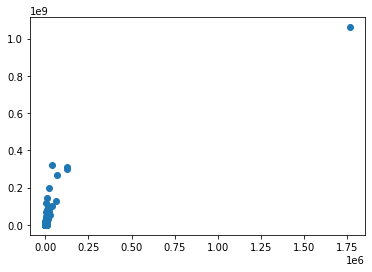

In [15]:
#show the relation between area_m and price
plt.scatter(dfchecker.area_m2,dfchecker.price)


In [16]:
#find the area_m^2 > 12500
dfchecker[dfchecker['area_m2']>12500]

,city_region,city,district,lat,long,realestate_type,parcel_use,price_per_m2,area_m2,price
1447,North of Riyadh,Riyadh,Heteen,46.601657,24.752796,PARCEL,COMMERCIAL,3500,14000,49000000
1605,North of Riyadh,Riyadh,Almalqa,46.606565,24.804172,PARCEL,COMMERCIAL,2735,37294,101999999
1727,North of Riyadh,Riyadh,Alaqeeq,46.616197,24.755681,PARCEL,COMMERCIAL,10296,19425,200000000
1771,North of Riyadh,Riyadh,Heteen,46.616530,24.752876,LAND,RESIDENTIAL,4691,14951,70135000
1834,North of Riyadh,Riyadh,Heteen,46.602553,24.753178,PARCEL,COMMERCIAL,2400,14000,33600000
1903,North of Riyadh,Riyadh,Almalqa,46.592203,24.802136,LAND,RESIDENTIAL,2500,123710,309276150
2006,North of Riyadh,Riyadh,Alaqeeq,46.625326,24.752802,PARCEL,COMMERCIAL,5997,17205,103176000
2073,North of Riyadh,Riyadh,Heteen,46.592391,24.746293,PARCEL,COMMERCIAL,1997,64096,128000000
2937,North of Riyadh,Riyadh,Alkairawan,46.582305,24.804705,PARCEL,COMMERCIAL,600,1767598,1060558710
3601,North of Riyadh,Riyadh,Almalqa,46.592203,24.802136,LAND,RESIDENTIAL,2339,128260,300000000


In [17]:
#find the price > 100000000

dfchecker[dfchecker['price']>100000000]

,city_region,city,district,lat,long,realestate_type,parcel_use,price_per_m2,area_m2,price
145,North of Riyadh,Riyadh,Almalqa,46.616071,24.821242,LAND,RESIDENTIAL,34082,3380,115188180
1605,North of Riyadh,Riyadh,Almalqa,46.606565,24.804172,PARCEL,COMMERCIAL,2735,37294,101999999
1727,North of Riyadh,Riyadh,Alaqeeq,46.616197,24.755681,PARCEL,COMMERCIAL,10296,19425,200000000
1903,North of Riyadh,Riyadh,Almalqa,46.592203,24.802136,LAND,RESIDENTIAL,2500,123710,309276150
2006,North of Riyadh,Riyadh,Alaqeeq,46.625326,24.752802,PARCEL,COMMERCIAL,5997,17205,103176000
2073,North of Riyadh,Riyadh,Heteen,46.592391,24.746293,PARCEL,COMMERCIAL,1997,64096,128000000
2937,North of Riyadh,Riyadh,Alkairawan,46.582305,24.804705,PARCEL,COMMERCIAL,600,1767598,1060558710
3601,North of Riyadh,Riyadh,Almalqa,46.592203,24.802136,LAND,RESIDENTIAL,2339,128260,300000000
3966,North of Riyadh,Riyadh,Almalqa,46.606565,24.804172,PARCEL,COMMERCIAL,8676,37294,323560874
4040,North of Riyadh,Riyadh,Alsahafa,46.619776,24.792591,APARTMENT,RESIDENTIAL,14734,9794,144298573


In [18]:
#drop outliers index
dfchecker.drop(dfchecker.index[[145,1447,1605,1727,1771,1834,1903,2006,2073,2937,3601,3966,4040,4704,4895,5723]],axis=0, inplace= True)

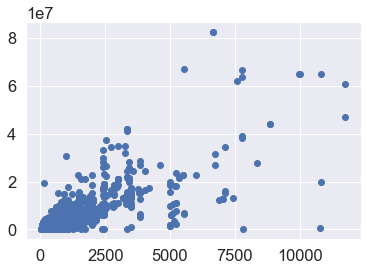

In [32]:
#show the relation between area_m and price after drop outliers index
plt.scatter(dfchecker.area_m2,dfchecker.price)


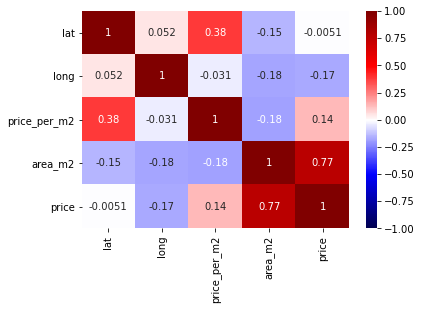

In [19]:
#a better corr matrix

sns.heatmap(dfchecker.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

count    5.930000e+03
mean     2.819449e+06
std      4.465930e+06
min      1.857000e+04
25%      1.035000e+06
50%      1.834000e+06
75%      2.956399e+06
max      8.250000e+07
Name: price, dtype: float64


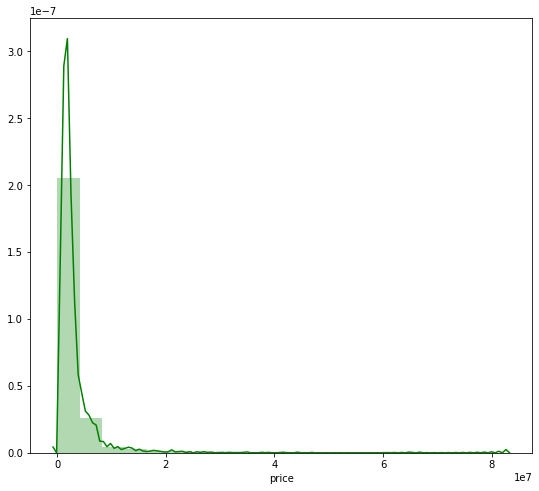

In [20]:
#take a look at how the housing price is distributed
print(dfchecker['price'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(dfchecker['price'], color='g', bins=20, hist_kws={'alpha': 0.3});

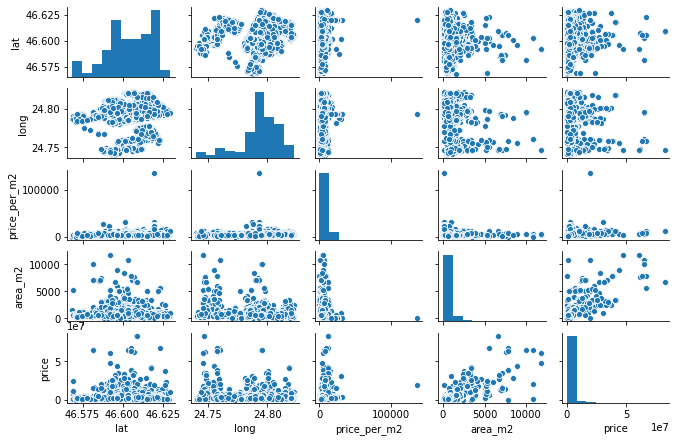

In [21]:
# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(dfchecker, height=1.2, aspect=1.5);

# Algorithms 
The models were used  linear Regression, Decision Tree, Random Forest, and Support Vector Machine. 

The steps to implement the models were as follows:

- After reading the data file, the features and the label are determined by finding the correlation between them.

- The data was divided into 80 training set and 20 test set to train the models on this data.

- Models were called and trained on data from the Scikit-learn library.

- After training the models on the training dataset, prediction values are found for each model. 

- Through the prediction values, the validity of the models is verified and the best model with a value closer and more accurate to the real values is found using a set of metrics such as R-square Mean Squared Error and Mean Absolute Error. 


# The Model 


In [22]:
#splite the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [24]:
#=======linear regression=======
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(x_train, y_train.values.ravel())


#==========SVM===========

ssvm= svm.SVC()
ssvm.fit(x_train, y_train.values.ravel())


#==========Decision Tree==================

dt=DecisionTreeRegressor(max_depth=2000)
dt.fit(x_train, y_train.values.ravel())


#========Random Forest===========
rf = RandomForestRegressor(n_estimators = 1000, max_depth=2000)
rf.fit(x_train, y_train.values.ravel())




RandomForestRegressor(max_depth=2000, n_estimators=1000)

In [25]:
#=== Calculating the prediction =====#
ypredict1=lin_reg.predict(x_test)
ypredict2=dt.predict(x_test)
ypredict3=rf.predict(x_test)
ypredict4=ssvm.predict(x_test)

In [26]:
#=== Calculating R Squere  =====
print('Linear Regression R^2',lin_reg.score(x_test,y_test))
print('Decision Tree R^2',dt.score(x_test,y_test))
print('Random Forest R^2',rf.score(x_test,y_test))
print('SVM R^2',ssvm.score(x_test,y_test))

Linear Regression R^2 0.30914434750226083
Decision Tree R^2 0.9436568695110406
Random Forest R^2 0.9846771498031133
SVM R^2 0.02689075630252101


In [27]:
#=== Calculating Mean Squered Error =====
from sklearn.metrics import mean_squared_error
from math import sqrt
rms1 = sqrt(mean_squared_error(y_test, ypredict1))
rms2=sqrt(mean_squared_error(y_test, ypredict2))
rms3=sqrt(mean_squared_error(y_test, ypredict3))
rms4 = sqrt(mean_squared_error(y_test, ypredict4))

print("MSE for Linear Regression=",rms1)
print("MSE for Decision Tree Regressor=",rms2)
print("MSE for Random Forest Regressor=",rms3)
print("MSE for SVM=",rms4)

MSE for Linear Regression= 4687697.584244916
MSE for Decision Tree Regressor= 1338709.7160061195
MSE for Random Forest Regressor= 698129.0447806827
MSE for SVM= 5659385.622483832


In [28]:
#==== Calculating Mean Absolute Error ===#

from sklearn.metrics import mean_absolute_error
MAEValue1 = mean_absolute_error(y_test, ypredict1, multioutput='uniform_average') 
MAEValue2 = mean_absolute_error(y_test, ypredict2, multioutput='uniform_average') 
MAEValue3 = mean_absolute_error(y_test, ypredict3, multioutput='uniform_average') 
MAEValue4 = mean_absolute_error(y_test, ypredict4, multioutput='uniform_average') 



print("MAE for Linear Regression=",MAEValue1)
print("MAE for Decision Tree Regressor=",MAEValue2)
print("MAE for Random Forest Regressor=",MAEValue3)
print("MAE for SVM =",MAEValue4)


MAE for Linear Regression= 1924833.314209379
MAE for Decision Tree Regressor= 179373.99825219403
MAE for Random Forest Regressor= 103095.36975954859
MAE for SVM = 1878710.3092436974


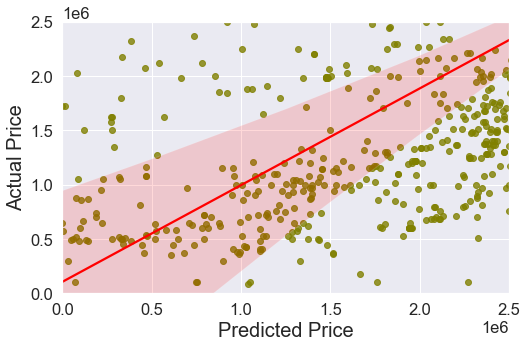

In [29]:
#Linear Regression Chart
x=pd.Series(ypredict1)
y=pd.Series(y_test)
sns.set_style("darkgrid", {'grid.linestyle': '-','axes.facecolor':'lavender'})
sns.set(font_scale=1.5)
plt.rcParams["axes.labelsize"] = 20
p=sns.regplot(x, y ,scatter_kws={"color": "olive"}, line_kws={"color": "red"})
p.set(xlim = (0, 2500000))
p.set(ylim = (0, 2500000))
p.set(xlabel='Predicted Price', ylabel='Actual Price')
p.figure.set_size_inches(8, 5)

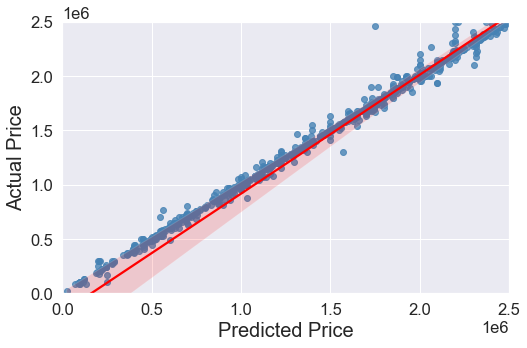

In [30]:
#Decision Tree Chart
x=pd.Series(ypredict2)
y=pd.Series(y_test)
sns.set_style("darkgrid", {'grid.linestyle': '-','axes.facecolor':'lavender'})
sns.set(font_scale=1.5)
plt.rcParams["axes.labelsize"] = 20
p=sns.regplot(x, y ,scatter_kws={"color": "steelblue"}, line_kws={"color": "red"})
p.set(xlim = (0, 2500000))
p.set(ylim = (0, 2500000))
p.set(xlabel='Predicted Price', ylabel='Actual Price')
p.figure.set_size_inches(8, 5)



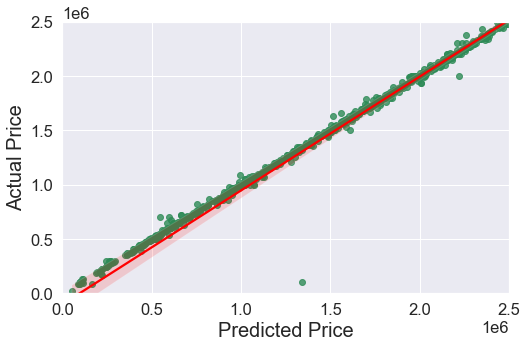

In [31]:
#Random Forest Chart
x=pd.Series(ypredict3)
y=pd.Series(y_test)
sns.set_style("darkgrid", {'grid.linestyle': '-','axes.facecolor':'lavender'})
sns.set(font_scale=1.5)
plt.rcParams["axes.labelsize"] = 20
p=sns.regplot(x, y ,scatter_kws={"color": "seagreen"}, line_kws={"color": "red"})
p.set(xlim = (0, 2500000))
p.set(ylim = (0, 2500000))
p.set(xlabel='Predicted Price', ylabel='Actual Price')
p.figure.set_size_inches(8, 5)


# Tools

- Numpy and Pandas for data manipulation
- Scikit-learn for modeling
- Matplotlib and Seaborn for plotting
